In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('./NLP')
sys.path.append('./RandomQueryGenerator')
import os
from TranslationToQueryGraph import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

## Play with the HumanMine model trained on 1000000 instances

Sentence (natural language query):
what is value, url, annotationversion, name from synonym, dataset, strain, probeset such that id lower than 87654
onmt_translate -batch_size 32 -beam_size 200 -model ./NLP/Models/model-HumanMine-1000000_step_2000.pt -src 32b1a036-d2a3-11eb-8e06-9dceacf71679.txt -output ./NLP/Translations/translation.out -replace_unk -n_best 2
===1===
['value synonym ; id synonym lower than 87654 ; url dataset ; annotationversion strain ; name probeset\n', 'value synonym ; url dataset ; id dataset lower than 87654 ; annotationversion strain ; name probeset\n']
2
===END 1===

Model predictions:
[{'original_query': 'what is value, url, annotationversion, name from synonym, dataset, strain, probeset such that id lower than 87654', 'prediction': {'raw': 'value Synonym ; id Synonym lower than 87654 ; url DataSet ; annotationVersion Strain ; name ProbeSet', 'attributes': ['value', 'url', 'annotationVersion', 'name'], 'classes': ['Synonym', 'DataSet', 'Strain', 'ProbeSet'], '

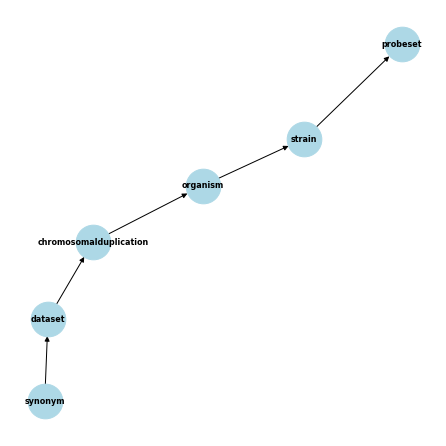

The English generated from the query graph is: what is value, name, url in synonym, dataset, chromosomalduplication, organism, strain, probeset having id Synonym lower than 87654

==========English from candidate Query Graph #2=============


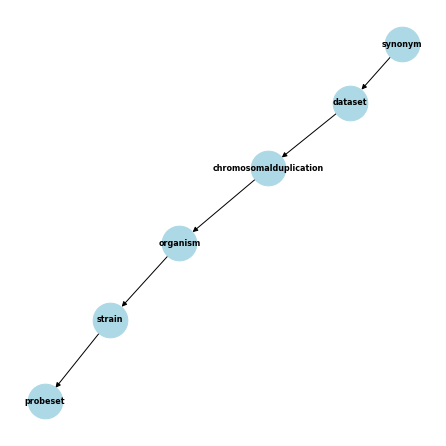

The English generated from the query graph is: what is value, name, url from synonym, dataset, chromosomalduplication, organism, strain, probeset where id DataSet lower than 87654


In [2]:
# Load the model
TranslationToQueryGraphObj = TranslationToQueryGraph(translationsOutputDir = "./NLP/Translations/", modelsDir = "./NLP/Models/", schemaDir="./Data/Schemas/HumanMinedbSchema.obj", model="HumanMine-1000000")

# Parameters for the translation
beam_size = 200 # Number of candidates considered in each branching of the beam search tree
candidates_considered = 2 # Number of candidate translations that will be finally obtained from the model (i.e. if it's 2, you will get 2 queries, if 3, 3 queries, and so on)

# Some example queries (from the test set). The last one is the one used, write your own if you want.
inputSentence = "what is value, url, annotationversion, name from synonym, dataset, strain, probeset such that id lower than 87654"

print("Sentence (natural language query):\n" + inputSentence)

# 1. Obtain predictions from the model
modelPredictions = TranslationToQueryGraphObj.obtainSentenceModelPrediction(inputSentence, n_best=candidates_considered, beam_size=beam_size, modelCheckpoint='2000', fromFile=False)

print("\nModel predictions:")
print(modelPredictions)
print("\n")

# 2. Obtain query graphs (number corresponds to n_best) from the model's predictions
queryGraphs = TranslationToQueryGraphObj.obtainQueryGraph(modelPredictions, debug=False)

# 3. Get the English back from each of the query graphs generated
for inx, queryGraph in enumerate(queryGraphs):
    if(isinstance(queryGraph, str)):
        continue
    print("\n==========English from candidate Query Graph #" + str(inx+1) + "=============")
    englishFromQueryGraph = TranslationToQueryGraphObj.getEnglishFromQueryGraph(queryGraph, showGraph=True) # To show the query graph too
